In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import cross_val_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
import matplotlib.pyplot as plt
import seaborn as sns




# Load the dataset
df = pd.read_csv("Restaurant_Reviews.tsv", delimiter='\t', quoting=3)

# Function to preprocess the text data
def preprocess_text(text):
    # Add your text preprocessing steps here
    return text

# Apply text preprocessing
df['Review'] = df['Review'].apply(preprocess_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Liked'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

# VADER Sentiment Analysis
vader_analyzer = SentimentIntensityAnalyzer()
vader_predictions = df['Review'].apply(lambda x: 1 if vader_analyzer.polarity_scores(x)['compound'] >= 0 else 0)


# Evaluation Metrics for VADER
vader_predictions = df['Review'].apply(lambda x: 1 if vader_analyzer.polarity_scores(x)['compound'] >= 0 else 0)
vader_accuracy = accuracy_score(df['Liked'], vader_predictions)
vader_recall = recall_score(df['Liked'], vader_predictions)
vader_precision = precision_score(df['Liked'], vader_predictions)
vader_f1 = f1_score(df['Liked'], vader_predictions)

# LSTM Sentiment Analysis
# Build your LSTM model here


# Tokenize and pad sequences
max_words = 5000  # Adjust based on your dataset
max_len = 100  # Adjust based on the average length of your reviews



tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 128, input_length=max_len))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = lstm_model.fit(X_train_seq, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
lstm_probabilities = lstm_model.predict(X_test_seq)
lstm_predictions = (lstm_probabilities > 0.5).astype(int).reshape(-1)

# Evaluation Metrics for LSTM
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_recall = recall_score(y_test, lstm_predictions)
lstm_precision = precision_score(y_test, lstm_predictions)
lstm_f1 = f1_score(y_test, lstm_predictions)

# Evaluation Metrics for VADER
vader_predictions = df['Review'].apply(lambda x: 1 if vader_analyzer.polarity_scores(x)['compound'] >= 0 else 0)
vader_accuracy = accuracy_score(df['Liked'], vader_predictions)
vader_recall = recall_score(df['Liked'], vader_predictions)
vader_precision = precision_score(df['Liked'], vader_predictions)
vader_f1 = f1_score(df['Liked'], vader_predictions)

# Evaluation Metrics for LSTM
lstm_probabilities = lstm_model.predict(X_test_seq)
lstm_predictions = (lstm_probabilities > 0.5).astype(int).reshape(-1)
lstm_accuracy = accuracy_score(y_test, lstm_predictions)
lstm_recall = recall_score(y_test, lstm_predictions)
lstm_precision = precision_score(y_test, lstm_predictions)
lstm_f1 = f1_score(y_test, lstm_predictions)

# Print or plot the evaluation metrics
print("VADER Accuracy:", vader_accuracy)
print("VADER Recall:", vader_recall)
print("VADER Precision:", vader_precision)
print("VADER F1 Score:", vader_f1)


print("LSTM Accuracy:", lstm_accuracy)
print("LSTM Recall:", lstm_recall)
print("LSTM Precision:", lstm_precision)
print("LSTM F1 Score:", lstm_f1)

# Plotting
# labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
# vader_scores = [vader_accuracy, vader_recall, vader_precision, vader_f1]
# lstm_scores = [lstm_accuracy, lstm_recall, lstm_precision, lstm_f1]

# df_scores = pd.DataFrame({'VADER': vader_scores, 'LSTM': lstm_scores}, index=labels)

# plt.figure(figsize=(10, 6))
# sns.barplot(data=df_scores, palette="viridis")
# plt.title('Comparison of Sentiment Analysis Models')
# plt.ylabel('Score')
# plt.show()


Epoch 1/5
20/20 [==============================] - 12s 470ms/step - loss: 0.6886 - accuracy: 0.5813 - val_loss: 0.6832 - val_accuracy: 0.6750
Epoch 2/5
20/20 [==============================] - 8s 378ms/step - loss: 0.6318 - accuracy: 0.6922 - val_loss: 0.6242 - val_accuracy: 0.6625
Epoch 3/5
20/20 [==============================] - 8s 421ms/step - loss: 0.4727 - accuracy: 0.8141 - val_loss: 0.5590 - val_accuracy: 0.7000
Epoch 4/5
20/20 [==============================] - 7s 370ms/step - loss: 0.3823 - accuracy: 0.8687 - val_loss: 0.5461 - val_accuracy: 0.7125
Epoch 5/5
7/7 [==============================] - 1s 73ms/step
VADER Accuracy: 0.723
VADER Recall: 0.966
VADER Precision: 0.6500672947510094
VADER F1 Score: 0.7771520514883347
LSTM Accuracy: 0.685
LSTM Recall: 0.6826923076923077
LSTM Precision: 0.7029702970297029
LSTM F1 Score: 0.6926829268292684


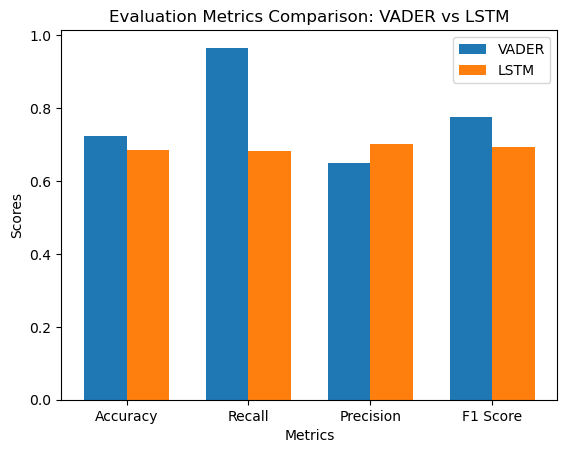

In [8]:
import matplotlib.pyplot as plt

# Define the evaluation metrics
labels = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
vader_metrics = [vader_accuracy, vader_recall, vader_precision, vader_f1]
lstm_metrics = [lstm_accuracy, lstm_recall, lstm_precision, lstm_f1]

# Set up the bar width and positions
bar_width = 0.35
index = range(len(labels))

# Plot VADER metrics
plt.bar(index, vader_metrics, bar_width, label='VADER')

# Plot LSTM metrics
plt.bar([i + bar_width for i in index], lstm_metrics, bar_width, label='LSTM')

# Set labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison: VADER vs LSTM')
plt.xticks([i + bar_width/2 for i in index], labels)
plt.legend()

# Show the plot
plt.show()